In [1]:
#import msparser
import os
import signal
import subprocess
import sys
import time
from tabulate import tabulate

import numpy as np
import matplotlib.pyplot as plt

from matplotlib.ticker import EngFormatter

names = ["results-REL-pubs.txt", "results-REL-subs.txt", "results-BE-pubs.txt", "results-BE-subs.txt"]

descriptions = ["Publishers - Reliable streams",
                "Subscribers - Reliable streams",
                "Publishers - BE streams",
                "Subscribers - BE streams"]

memo_cons = []
topic_sizes = []
entities_sizes = []

In [2]:
with open(names[0]) as p:
    file = p.read()
file = " ".join(file.split("\n")[1:])
data = [int(x) for x in file.split(" ") if len(x)]
data = np.reshape(data, (20, 3))
print(data)

[[    1     1 42869]
 [    1   342 42833]
 [    1   683 42849]
 [    1  1025 42925]
 [    1  1366 42833]
 [    5     1 44621]
 [    5   342 44633]
 [    5   683 44629]
 [    5  1025 44501]
 [    5  1366 44517]
 [   10     1 46687]
 [   10   342 46683]
 [   10   683 46695]
 [   10  1025 46679]
 [   10  1366 46703]
 [   15     1 48797]
 [   15   342 48721]
 [   15   683 48769]
 [   15  1025 48773]
 [   15  1366 48765]]


In [7]:
es = list(dict.fromkeys([x[0] for x in data]))
ts = list(dict.fromkeys([x[1] for x in data]))

print(es)
mem = []

for topic_size in ts:
    print(topic_size)
    for entities_size in es:
        print(entities_size)
        line = [x for x in data if x[0] == entities_size and x[1] == topic_size][0]
        mem.append(line[2])
print(mem)

[1, 5, 10, 15]
1
1
5
10
15
342
1
5
10
15
683
1
5
10
15
1025
1
5
10
15
1366
1
5
10
15
[42869, 44621, 46687, 48797, 42833, 44633, 46683, 48721, 42849, 44629, 46695, 48769, 42925, 44501, 46679, 48773, 42833, 44517, 46703, 48765]


In [12]:
for i in range(len(names)):
    with open(names[i],'r') as p:
        file = p.read()
        
    file = " ".join(file.split("\n")[1:])
    data = [int(x) for x in file.split(" ") if len(x)]
    data = np.reshape(data, (20, 3))

    ts = list(dict.fromkeys([x[1] for x in data]))
    es = list(dict.fromkeys([x[0] for x in data]))
    
    topic_sizes.append(ts)
    entities_sizes.append(es)
    mem = []
    
    for topic_size in ts:
        for entities_size in es:
            line = [x for x in data if x[0] == entities_size and x[1] == topic_size][0]
            mem.append(line[2])
    
    mem = np.reshape(mem, (len(topic_sizes[i]), len(entities_sizes[i])))
    memo_cons.append(mem)

In [11]:
print(topic_sizes)
print(entities_sizes)
print(memo_cons)

[[1, 342, 683, 1025, 1366], [1, 342, 683, 1025, 1366], [1, 123, 246, 368, 490], [1, 123, 246, 368, 490], [1, 342, 683, 1025, 1366], [1, 342, 683, 1025, 1366], [1, 123, 246, 368, 490], [1, 123, 246, 368, 490]]
[[1, 5, 10, 15], [1, 5, 10, 15], [1, 5, 10, 15], [1, 5, 10, 15], [1, 5, 10, 15], [1, 5, 10, 15], [1, 5, 10, 15], [1, 5, 10, 15]]
[array([[42869, 44621, 46687, 48797],
       [42833, 44633, 46683, 48721],
       [42849, 44629, 46695, 48769],
       [42925, 44501, 46679, 48773],
       [42833, 44517, 46703, 48765]]), array([[ 50843,  85502, 128941, 172555],
       [ 50767,  85511, 128929, 172403],
       [ 50807,  85535, 129129, 172527],
       [ 50807,  85739, 129141, 172519],
       [ 51031,  85523, 129121, 172539]]), array([[42717, 44369, 46427, 48501],
       [42681, 44333, 46395, 48469],
       [42681, 44329, 46403, 48417],
       [42681, 44333, 46399, 48453],
       [42681, 44321, 46411, 48465]]), array([[ 50851,  85203, 128613, 171991],
       [ 50775,  85175, 128561, 171955]

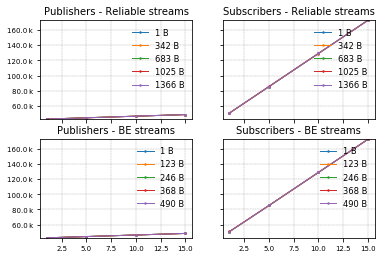

In [13]:
fig, axs = plt.subplots(2, 2, sharex='col', sharey='row')
axs = axs.flatten()

formatter1 = EngFormatter(places=1, sep="\N{THIN SPACE}")

for i in range(len(names)):
    for j,n in zip(memo_cons[i], topic_sizes[i]):
        axs[i].plot(entities_sizes[i], j, 'o-', markersize=1.5, linewidth=1, label="{:d} B".format(n))
        axs[i].legend(frameon=False, fontsize='small')
        axs[i].set_ylim([42717,172539])
        #axs[i].set_xlim([0,3000])
        axs[i].set_title(descriptions[i], fontsize=10)
        axs[i].grid(b=True, which='major', linestyle='--', color='grey', linewidth=0.3)
        axs[i].grid(b=True, which='minor', linestyle='--', color='grey', linewidth=0.3)
        axs[i].xaxis.set_major_formatter(formatter1)
        axs[i].yaxis.set_major_formatter(formatter1)
        axs[i].tick_params(axis='both', which='major', labelsize=7)